In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import r2_score


In [17]:
df = pd.read_csv(r"C:\Users\youse\Desktop\INDIA PROJECT TECHNO\archive (4)\creditcard.csv")


In [18]:
print(df.head())
print(df.info())
print(df.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [19]:
# Split data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Initialize the Random Forest Classifier with fewer trees and parallelization
clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

# Fit the model
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]


In [21]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calculate AUPRC
auprc = auc(recall, precision)
print(f'AUPRC: {auprc}')

# Average Precision Score
average_precision = average_precision_score(y_test, y_pred_prob)
print(f'Average Precision Score: {average_precision}')



AUPRC: 0.8681421041021209
Average Precision Score: 0.8581299247859637


In [22]:
r2 = r2_score(y_test, y_pred_prob)
print(f'R^2 Score: {r2}')


R^2 Score: 0.7651796779713574


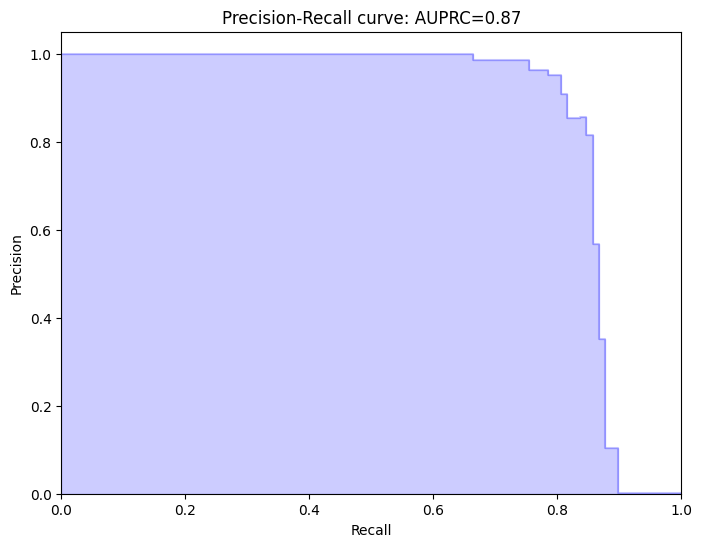

In [23]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AUPRC={auprc:0.2f}')
plt.show()